# Feature Engineering
    
    Numerical Transformations
    Categorical 
    Time
    Text
    
       
    
    
# Time Series Forecasting
    
    %%html
<!-- <style>
div.input {
    display:none;
}
</style> -->
    
    
    





In [2]:
import kats

C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.4SP5SUA7CBGXUEOC35YP2ASOICYYEQZZ.gfortran-win_amd64.dll
C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
from matplotlib import pyplot as plt
import datasets

from datetime import datetime, timedelta
import sys
sys.path.append("../")

from kats.consts import TimeSeriesData
# plt.rcParams["figure.figsize"] = (40,10)


In [6]:
#Fetch data 
stores=pd.read_csv("data/store-sales-time-series-forecasting/train.csv") #Time Series Forecasting
# credit=pd.read_csv("data/creditcard.csv")
fitbit=pd.read_csv("data/minuteStepsNarrow_merged.csv")
# ninelevel=pd.read_csv("data/911.csv")
airline=pd.read_csv("data/AirPassengers.csv")
ap = pd.read_csv("data/AirPassengers.csv", parse_dates=[0])
ap.columns=['Month','values']

In [7]:
stores.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [8]:
ap

,Month,values
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


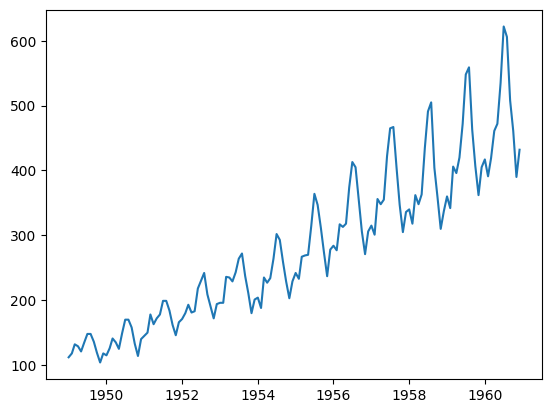

In [9]:
ap = pd.read_csv("data/AirPassengers.csv", parse_dates=[0])
ap.columns=['Month','values']
ap=ap.set_index('Month')
plt.plot(ap)
plt.show()

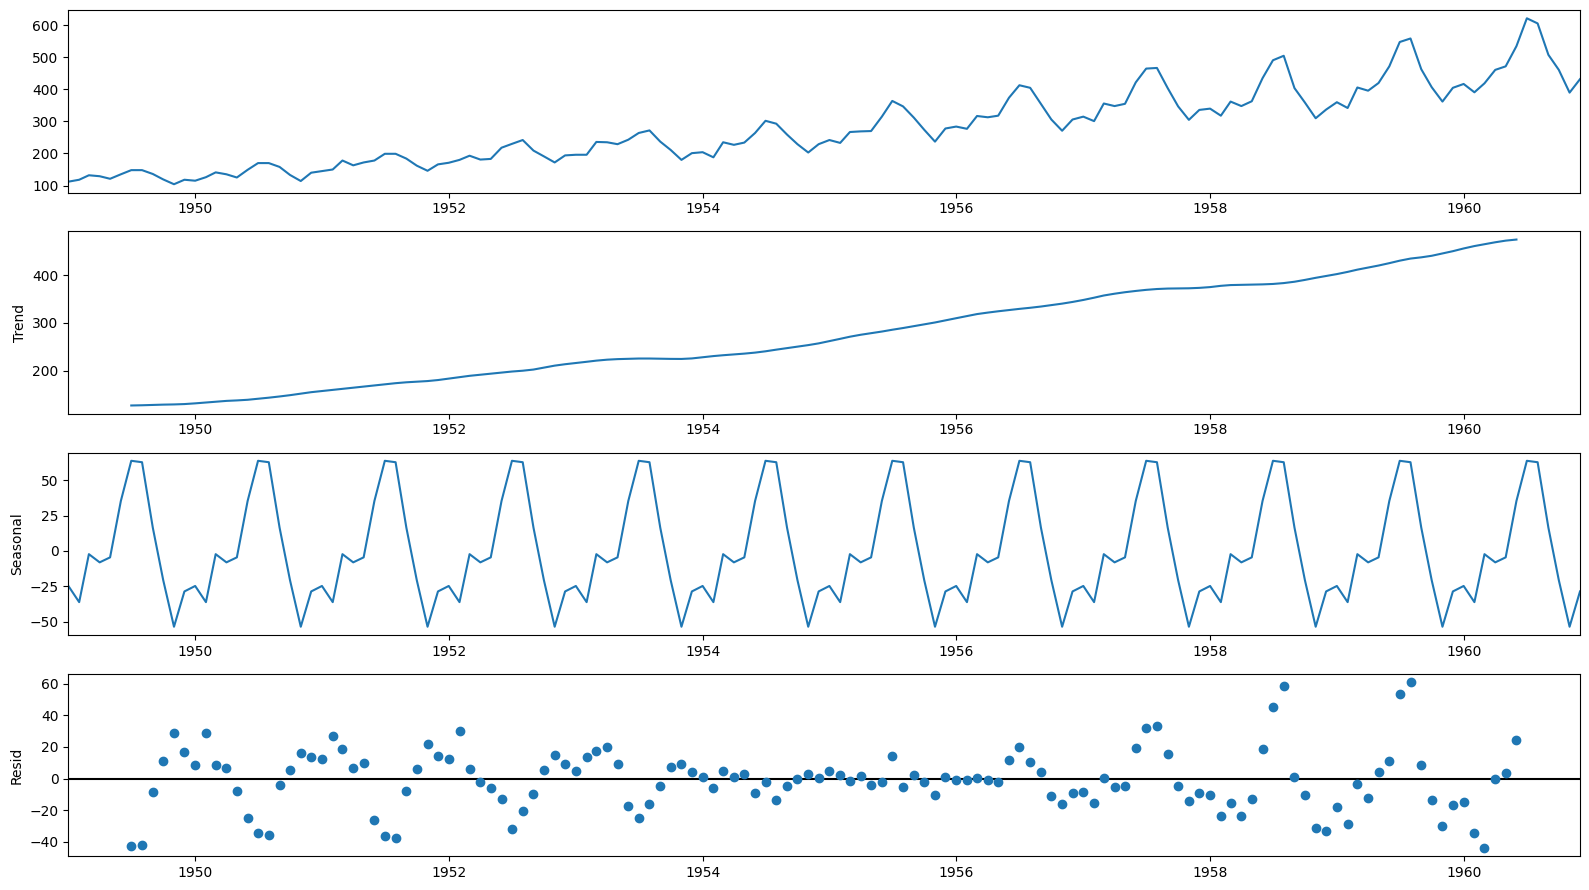

In [10]:
#Decompose
import statsmodels.api as sm
plt.rc("figure",figsize=(20,20)) 
res = sm.tsa.seasonal_decompose(ap)
resplot = res.plot()
resplot.set_size_inches((16, 9))
# Tight layout to realign things
resplot.tight_layout()
plt.show()
plt.show()

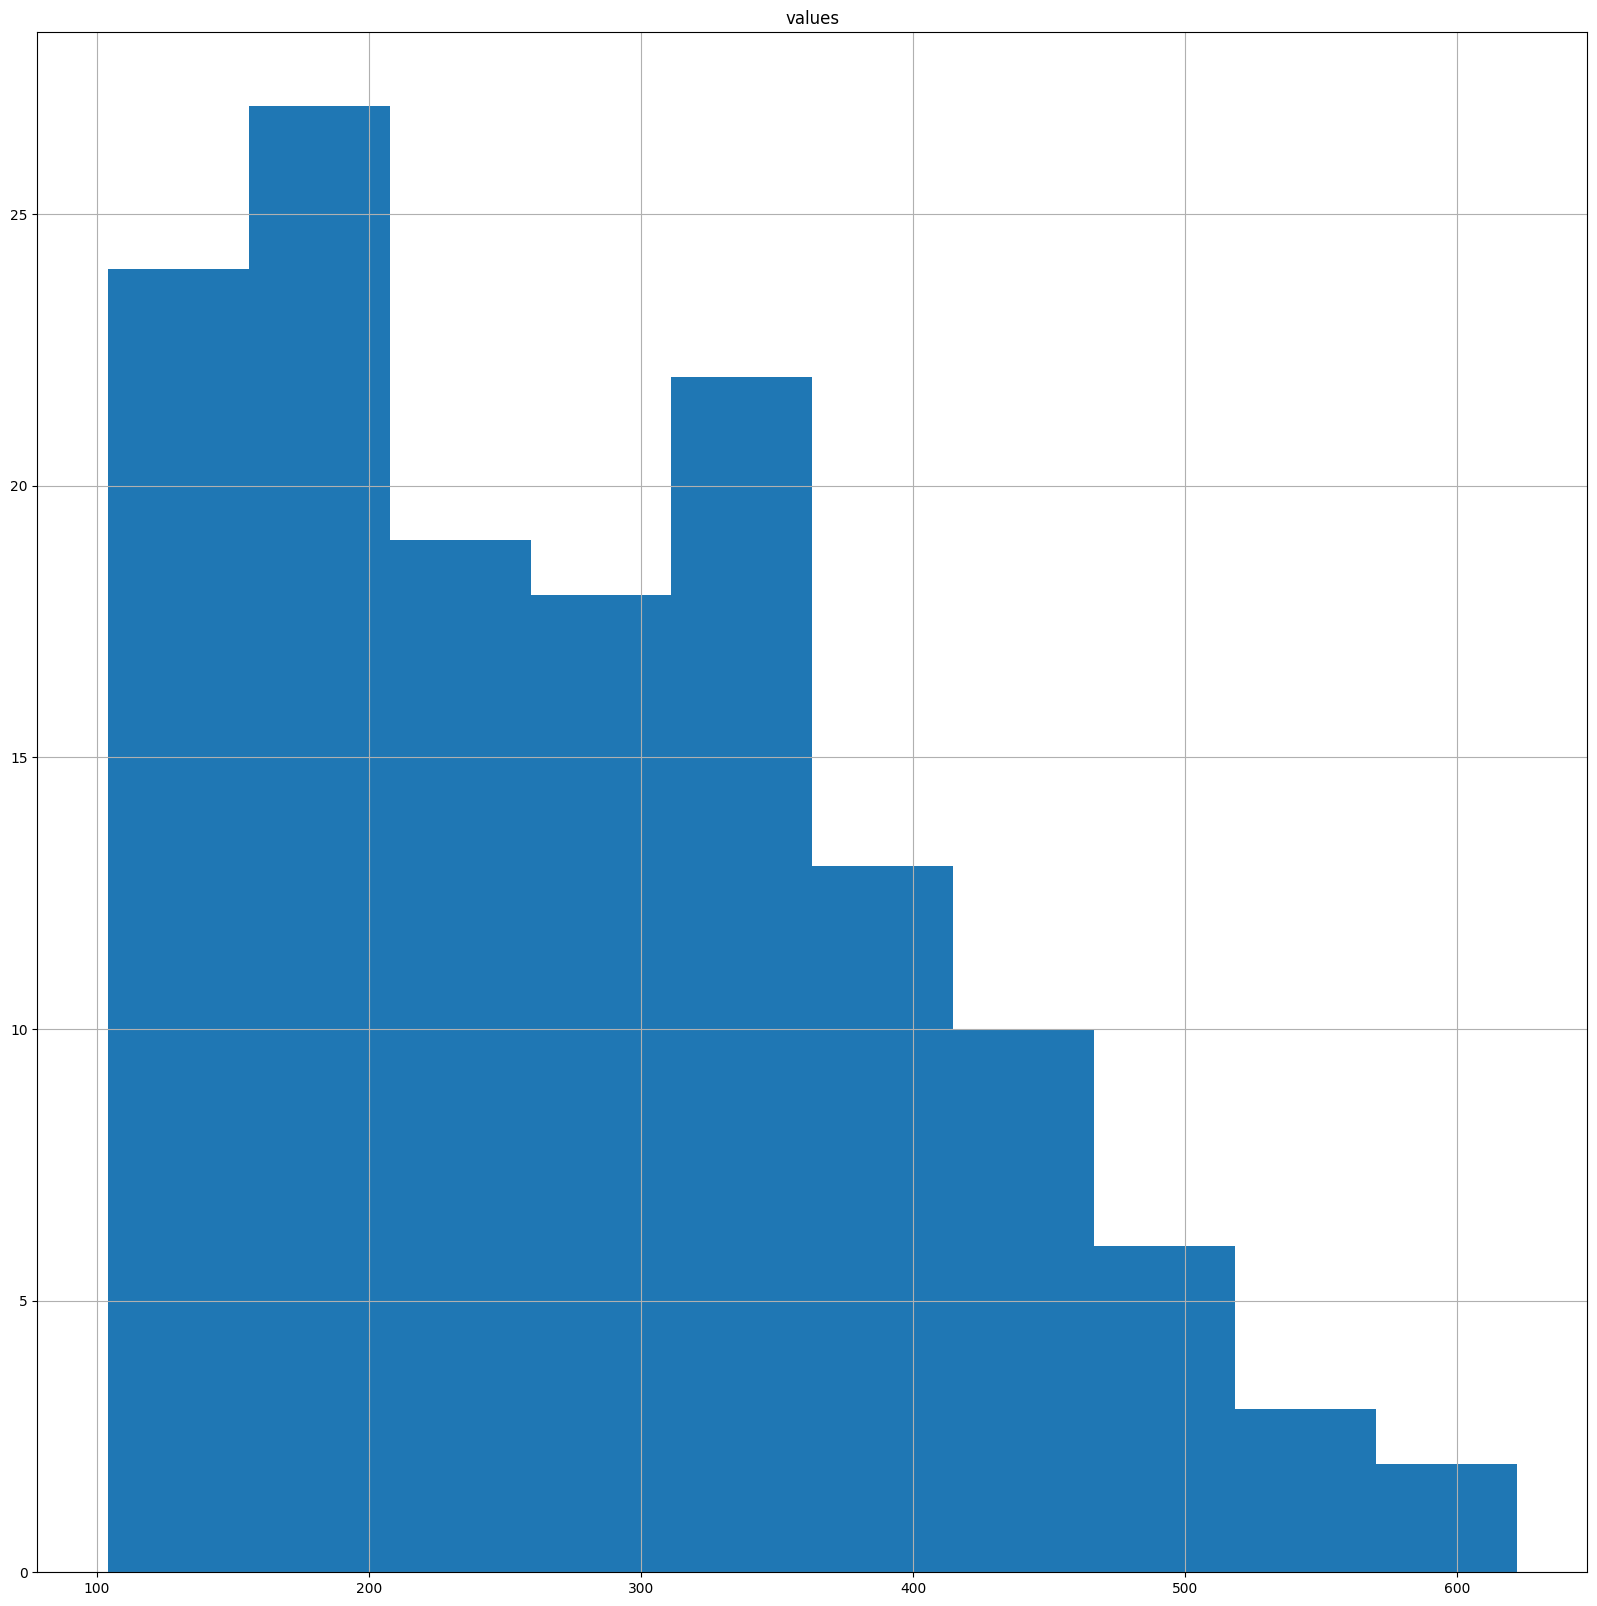

In [11]:
#Stationarity Test

ap.hist()
plt.show()

### ADF Fuller Test

#### H0 = The time series is non-stationary

In [12]:
from pandas import read_csv
from scipy import stats
from statsmodels.tsa.stattools import adfuller
result = adfuller(ap)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [13]:
temp=stats.boxcox(ap.values[:, 0])
ap2=np.diff(np.log(ap.values[:, 0]))
result = adfuller(np.diff(temp[0]))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.871708
p-value: 0.048738
Critical Values:
	1%: -3.483
	5%: -2.884
	10%: -2.579


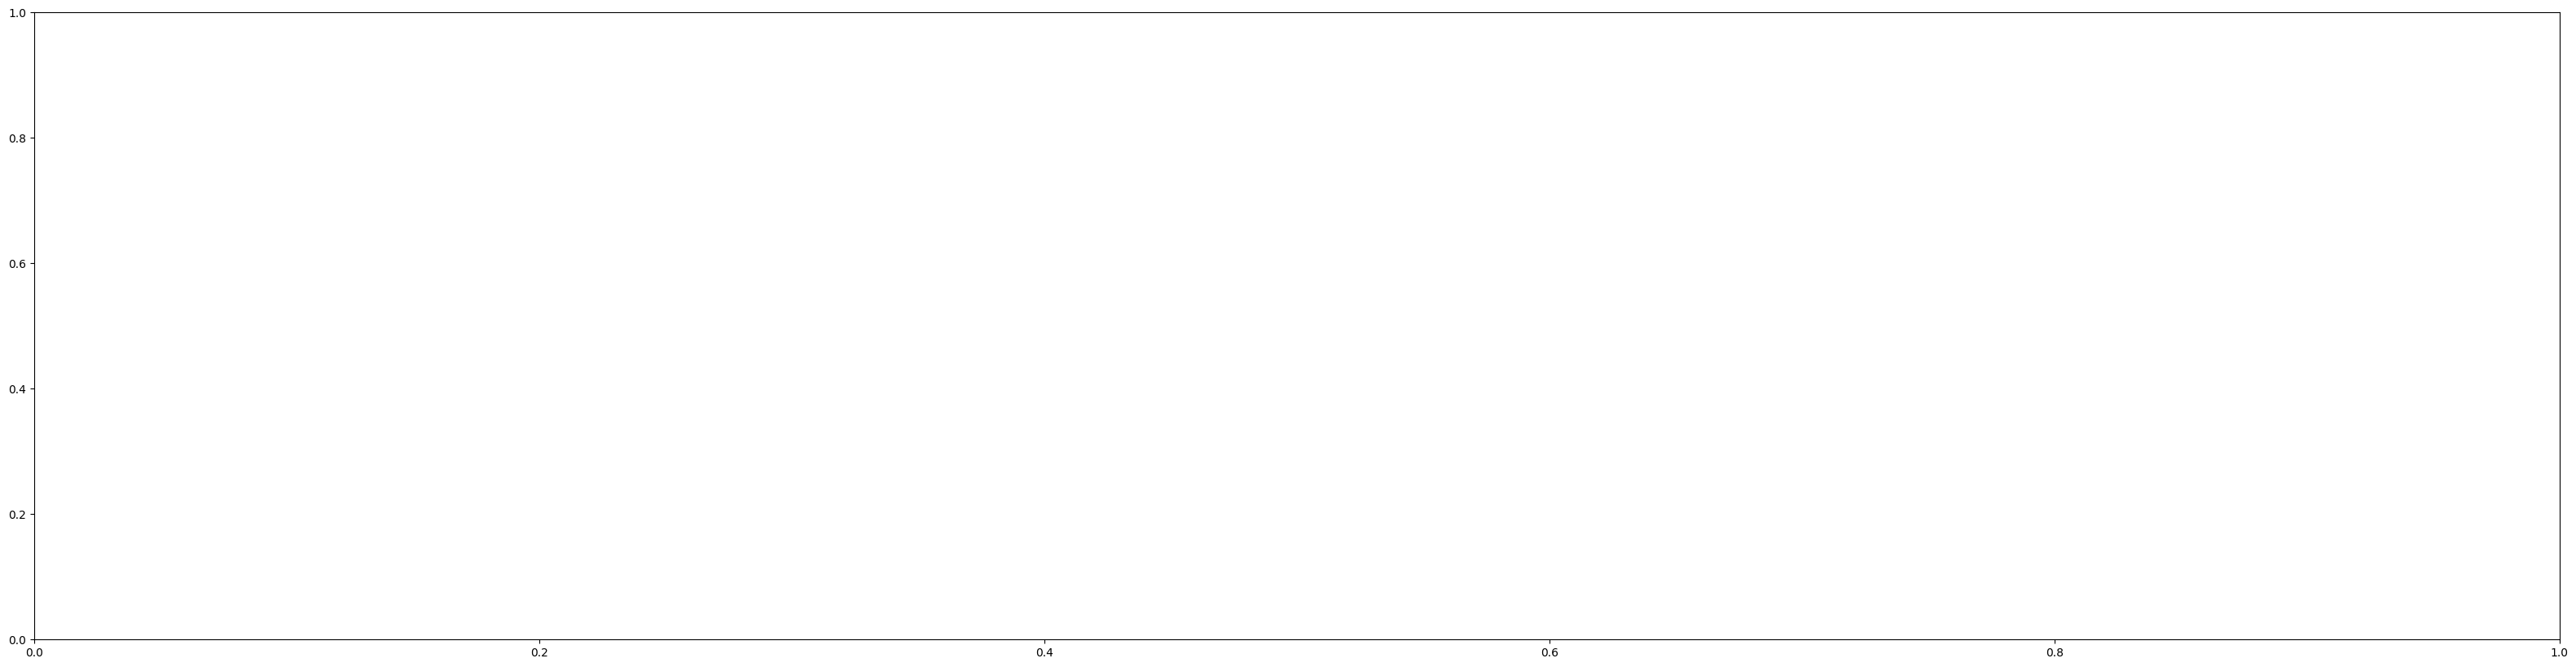

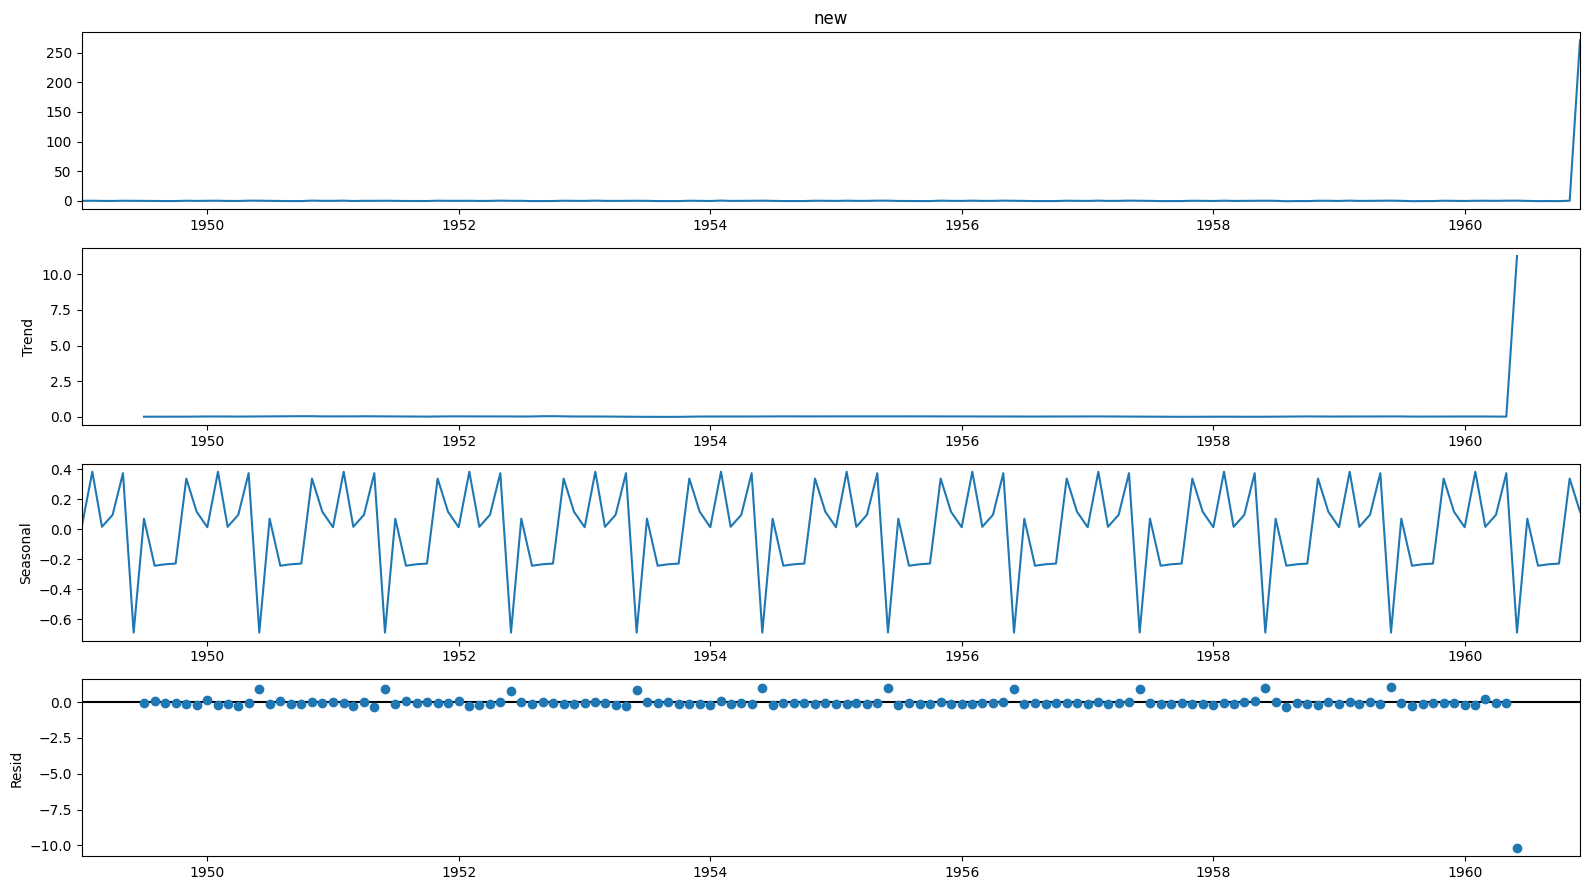

In [14]:
#Decompose
import statsmodels.api as sm
plt.rc("figure",figsize=(20,20)) 
ap2=ap
val=(ap.values.mean())

ap2['new']=np.diff(temp[0],append=val)

res = sm.tsa.seasonal_decompose(ap2.new)
# ap2.dtypes
plt.rcParams["figure.figsize"] = (40,10)
plt.xticks(fontsize=10)
resplot = res.plot()
resplot.set_size_inches((16, 9))
# Tight layout to realign things
resplot.tight_layout()
plt.show()


In [15]:
fitbit2=fitbit[fitbit.Id==1503960366]
fitbit2['Time']=pd.to_datetime(fitbit2['ActivityMinute'])
fitbit2['Hour']=fitbit2['Time'].dt.to_period('H')
fitbit2['Date']=fitbit2['Time'].dt.date
fitbit2['Dayoftheweek']=fitbit2['Time'].dt.weekday
fitbit2['IsWeekend']=np.where(fitbit2['Dayoftheweek']>=5, 'YES','NO')
fitbit2


C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Id,ActivityMinute,Steps,Time,Hour,Date,Dayoftheweek,IsWeekend
0,1503960366,4/12/2016 12:00:00 AM,0,2016-04-12 00:00:00,2016-04-12 00:00,2016-04-12,1,NO
1,1503960366,4/12/2016 12:01:00 AM,0,2016-04-12 00:01:00,2016-04-12 00:00,2016-04-12,1,NO
2,1503960366,4/12/2016 12:02:00 AM,0,2016-04-12 00:02:00,2016-04-12 00:00,2016-04-12,1,NO
3,1503960366,4/12/2016 12:03:00 AM,0,2016-04-12 00:03:00,2016-04-12 00:00,2016-04-12,1,NO
4,1503960366,4/12/2016 12:04:00 AM,0,2016-04-12 00:04:00,2016-04-12 00:00,2016-04-12,1,NO
...,...,...,...,...,...,...,...,...
43015,1503960366,5/11/2016 8:55:00 PM,0,2016-05-11 20:55:00,2016-05-11 20:00,2016-05-11,2,NO
43016,1503960366,5/11/2016 8:56:00 PM,0,2016-05-11 20:56:00,2016-05-11 20:00,2016-05-11,2,NO
43017,1503960366,5/11/2016 8:57:00 PM,0,2016-05-11 20:57:00,2016-05-11 20:00,2016-05-11,2,NO
43018,1503960366,5/11/2016 8:58:00 PM,0,2016-05-11 20:58:00,2016-05-11 20:00,2016-05-11,2,NO


In [16]:
fitbit.isna().sum()

Id                0
ActivityMinute    0
Steps             0
dtype: int64

<Figure size 1500x800 with 0 Axes>

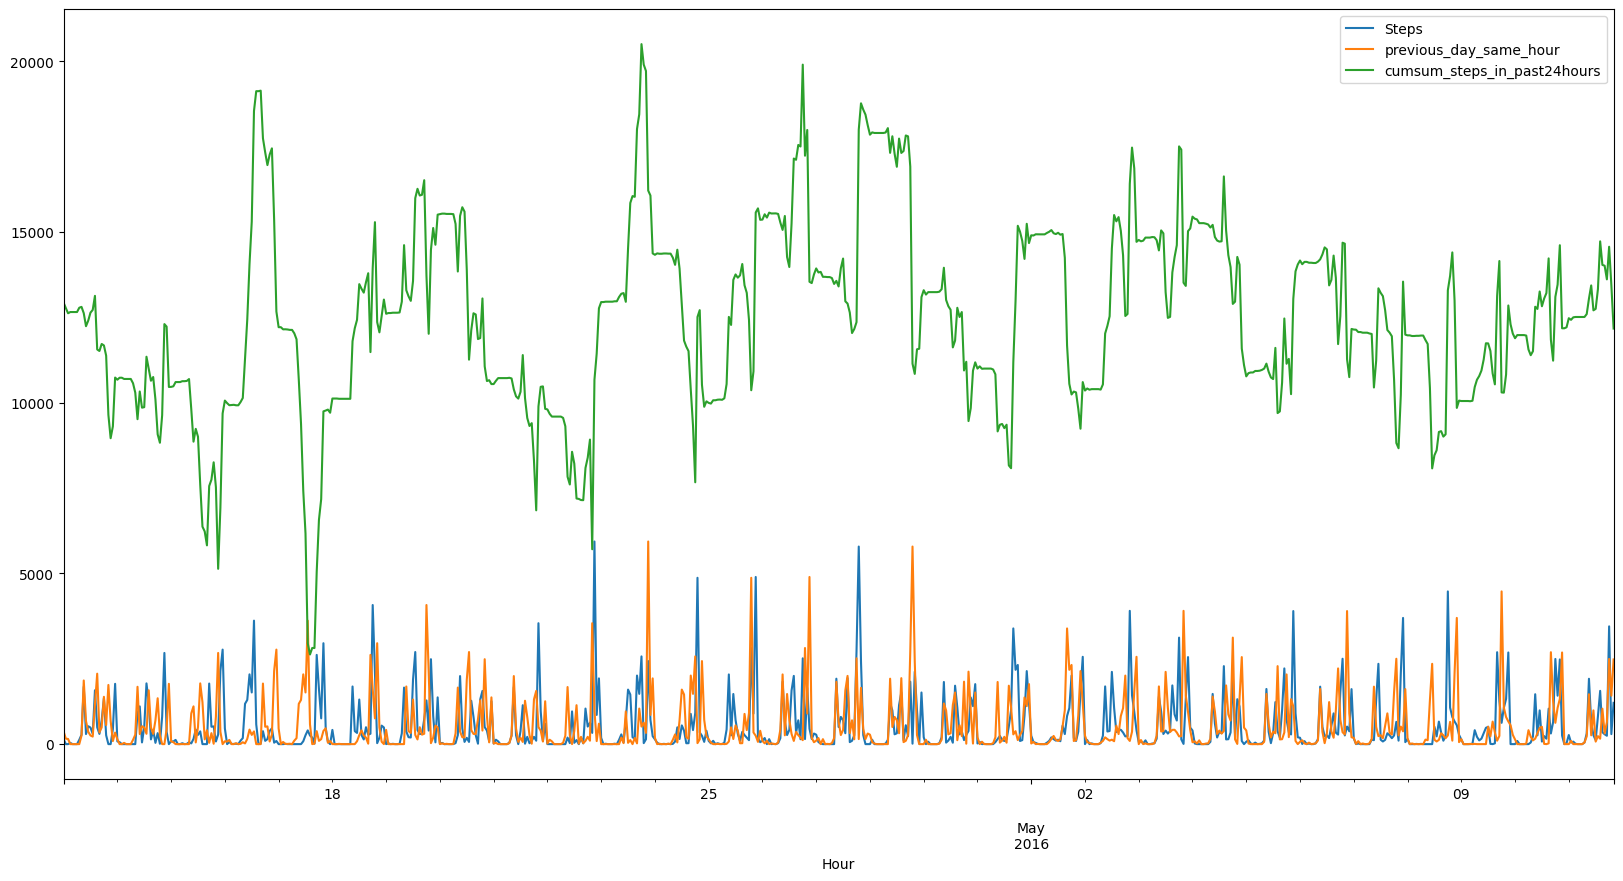

In [17]:
plt.figure(figsize=(15,8))

fitbit2_hourly=fitbit2.groupby(['Hour'])['Steps'].sum().reset_index()
fitbit2_hourly['previous_day_same_hour']=fitbit2_hourly.sort_values(['Hour'])['Steps'].shift(24)
fitbit2_hourly['cumsum_steps_in_past24hours']=fitbit2_hourly.Steps.rolling(window=24).sum()
fitbit2_hourly.dropna().set_index('Hour').plot(figsize=(20, 10))
plt.show()

### Smoothing using fitbit

In [38]:
fitbit2

,Id,ActivityMinute,Steps,Time,Hour,Date,Dayoftheweek,IsWeekend
0,1503960366,4/12/2016 12:00:00 AM,0,2016-04-12 00:00:00,2016-04-12 00:00,2016-04-12,1,NO
1,1503960366,4/12/2016 12:01:00 AM,0,2016-04-12 00:01:00,2016-04-12 00:00,2016-04-12,1,NO
2,1503960366,4/12/2016 12:02:00 AM,0,2016-04-12 00:02:00,2016-04-12 00:00,2016-04-12,1,NO
3,1503960366,4/12/2016 12:03:00 AM,0,2016-04-12 00:03:00,2016-04-12 00:00,2016-04-12,1,NO
4,1503960366,4/12/2016 12:04:00 AM,0,2016-04-12 00:04:00,2016-04-12 00:00,2016-04-12,1,NO
...,...,...,...,...,...,...,...,...
43015,1503960366,5/11/2016 8:55:00 PM,0,2016-05-11 20:55:00,2016-05-11 20:00,2016-05-11,2,NO
43016,1503960366,5/11/2016 8:56:00 PM,0,2016-05-11 20:56:00,2016-05-11 20:00,2016-05-11,2,NO
43017,1503960366,5/11/2016 8:57:00 PM,0,2016-05-11 20:57:00,2016-05-11 20:00,2016-05-11,2,NO
43018,1503960366,5/11/2016 8:58:00 PM,0,2016-05-11 20:58:00,2016-05-11 20:00,2016-05-11,2,NO


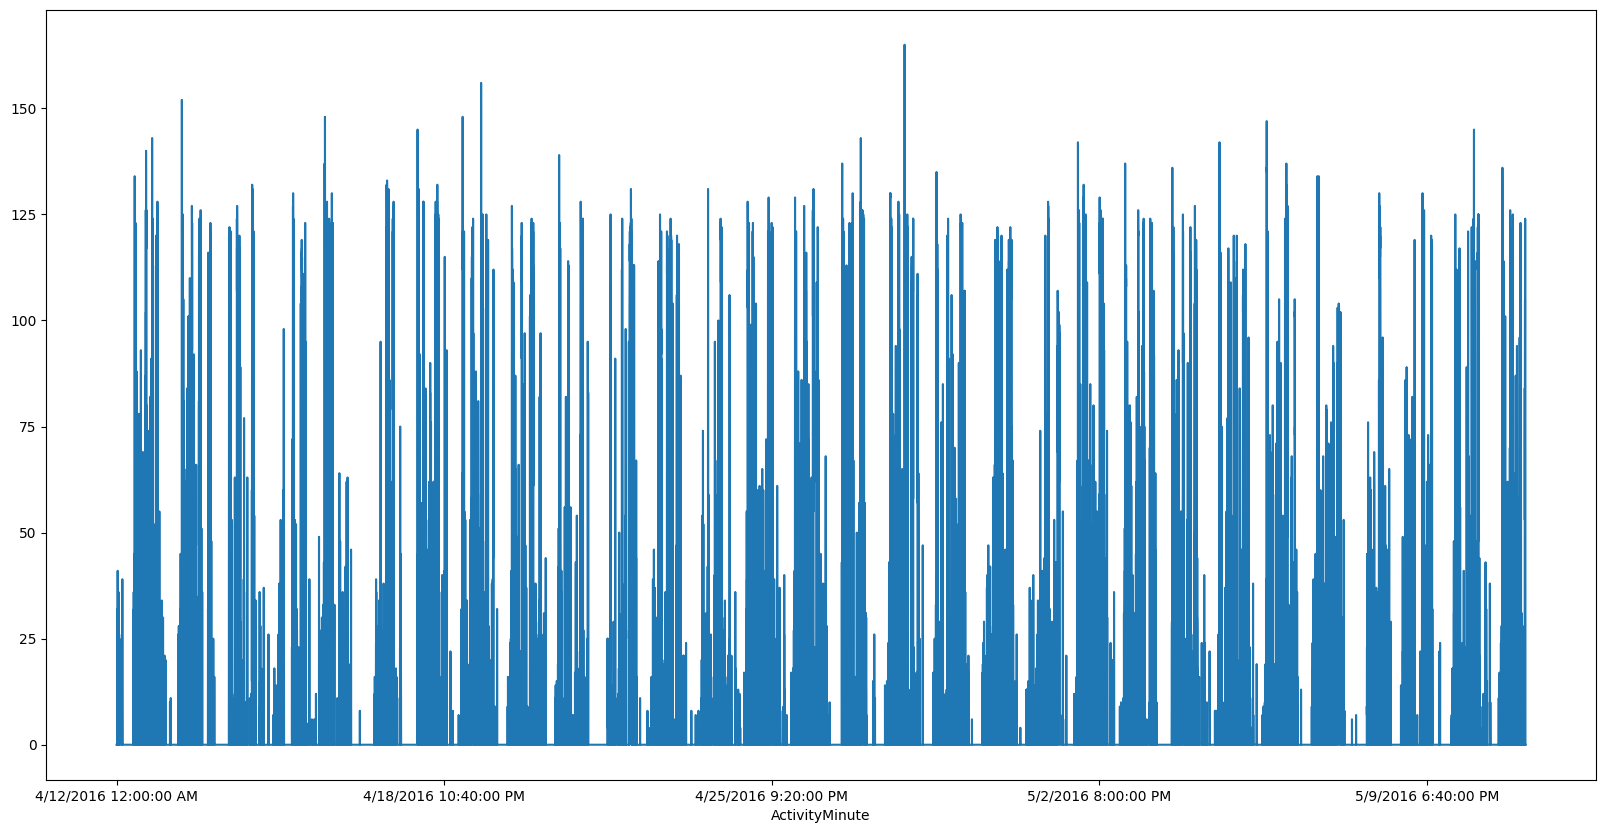

In [42]:
plt.figure(figsize=(15,8))

# fitbit2_hourly=fitbit2.groupby(['Hour'])['Steps'].sum().reset_index()
# fitbit2_hourly['previous_day_same_hour']=fitbit2_hourly.sort_values(['Hour'])['Steps'].shift(24)
# fitbit2_hourly['cumsum_steps_in_past24hours']=fitbit2_hourly.Steps.rolling(window=24).sum()
fitbit2.dropna().set_index('ActivityMinute')['Steps'].plot(figsize=(20, 10))
plt.show()

<Figure size 1500x800 with 0 Axes>

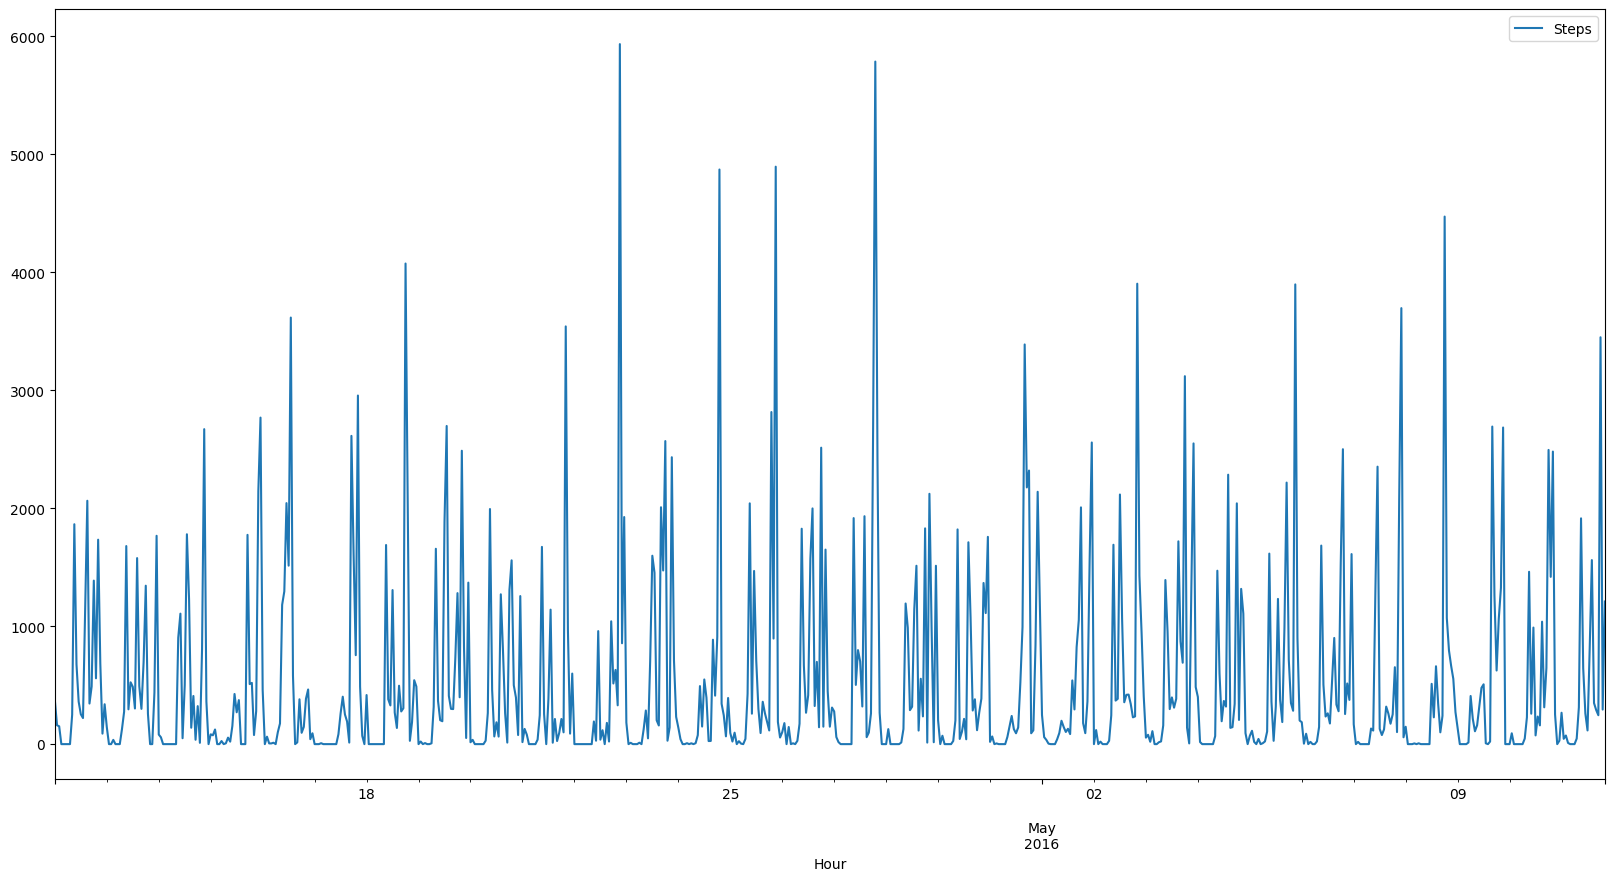

In [18]:
plt.figure(figsize=(15,8))

fitbit2_hourly=fitbit2.groupby(['Hour'])['Steps'].sum().reset_index()
# fitbit2_hourly['previous_day_same_hour']=fitbit2_hourly.sort_values(['Hour'])['Steps'].shift(24)
# fitbit2_hourly['cumsum_steps_in_past24hours']=fitbit2_hourly.Steps.rolling(window=24).sum()
fitbit2_hourly.dropna().set_index('Hour').plot(figsize=(20, 10))
plt.show()

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

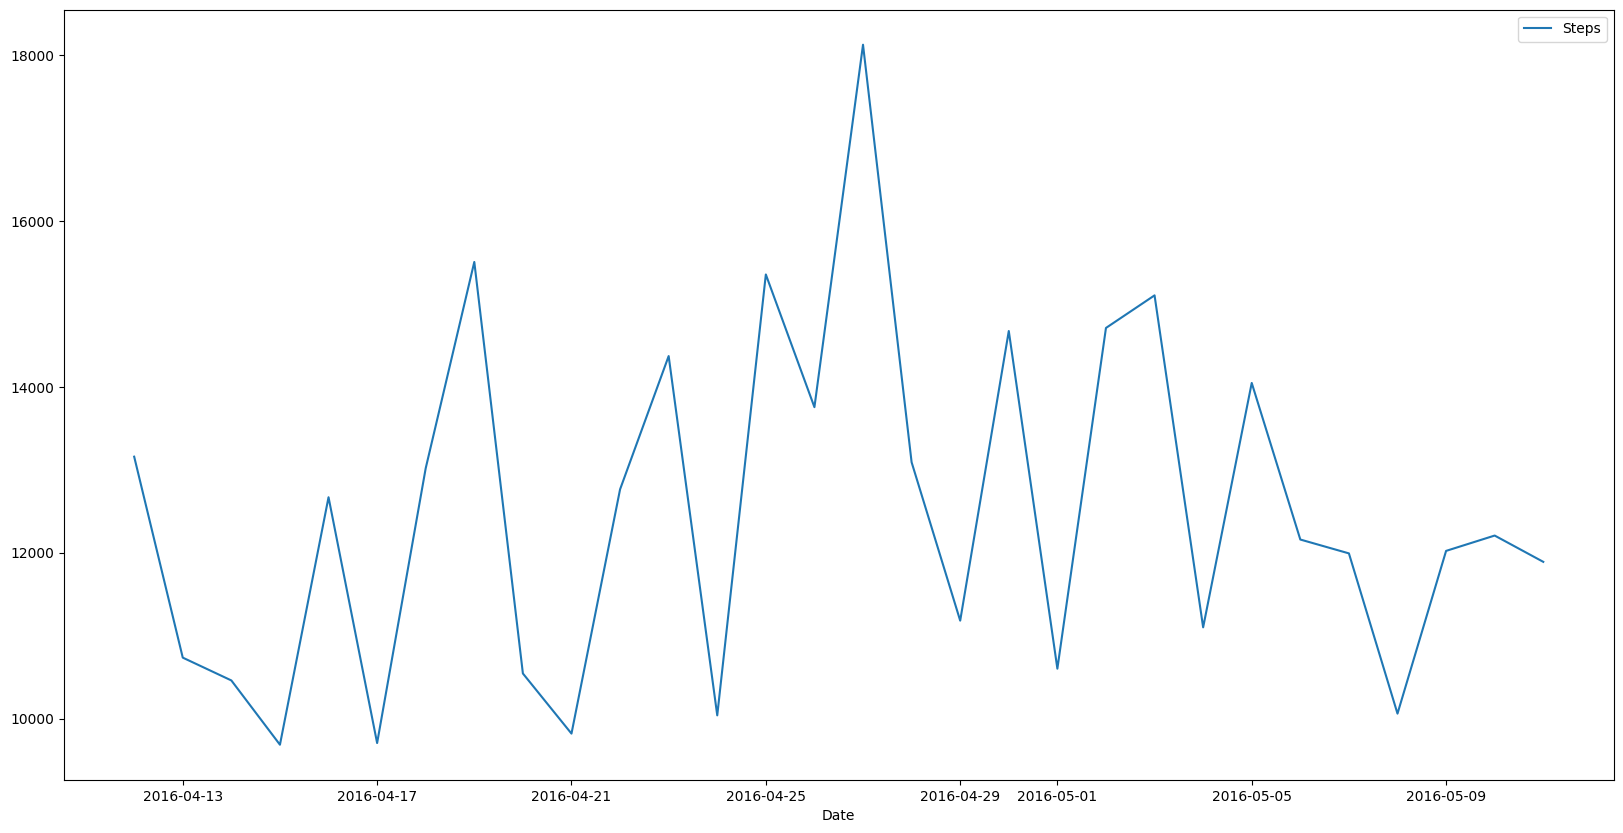

In [40]:
plt.figure(figsize=(15,8))

fitbit2_daily=fitbit2.groupby(['Date'])['Steps'].sum().reset_index()
# fitbit2_hourly['previous_day_same_hour']=fitbit2_hourly.sort_values(['Hour'])['Steps'].shift(24)
# fitbit2_hourly['cumsum_steps_in_past24hours']=fitbit2_hourly.Steps.rolling(window=24).sum()
fitbit2_daily.dropna().set_index('Date').plot(figsize=(20, 10))
plt.show()

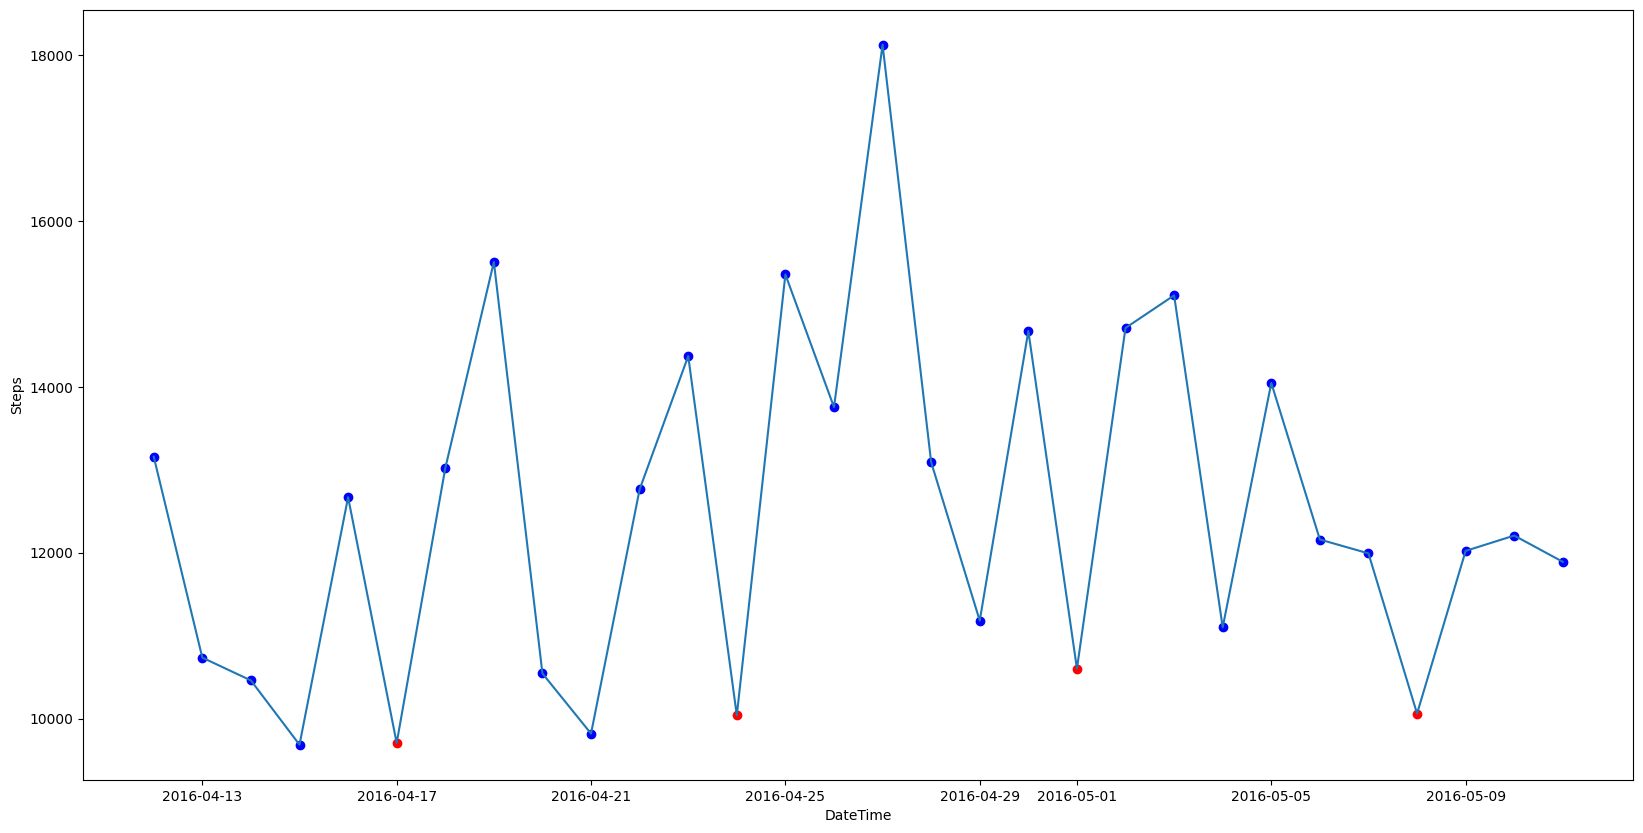

In [71]:
fitbit2_daily['DateTime']=pd.to_datetime(fitbit2_daily.Date)
fitbit2_daily['Weekday']=fitbit2_daily["DateTime"].dt.weekday
fitbit2_daily['IsWeekend']=np.where(fitbit2_daily["Weekday"]==6,1,0)
fig,axs=plt.subplots(nrows=1,figsize=(20,10))

sns.lineplot(data=fitbit2_daily,x='DateTime',y='Steps')
weekend=fitbit2_daily[fitbit2_daily.IsWeekend==1]
notweekend=fitbit2_daily[fitbit2_daily.IsWeekend==0]
plt.scatter(weekend.DateTime,weekend.Steps,color='r')
plt.scatter(notweekend.DateTime,notweekend.Steps,color='b')
plt.show()

In [19]:
stores['time']=pd.to_datetime(stores.date)

stores['date']=pd.to_datetime(stores.date)


plt.rcParams["figure.figsize"] = (40,10)
stores2=stores.groupby(["time","family"])['sales'].sum().reset_index()

cp_test=stores2[stores2.family=='GROCERY I'].drop('family',axis=1)
cp_test

,time,sales
12,2013-01-01,700.000
45,2013-01-02,202020.000
78,2013-01-03,144878.000
111,2013-01-04,135754.000
144,2013-01-05,188356.000
...,...,...
55419,2017-08-11,238221.922
55452,2017-08-12,238627.633
55485,2017-08-13,258442.452
55518,2017-08-14,225355.694


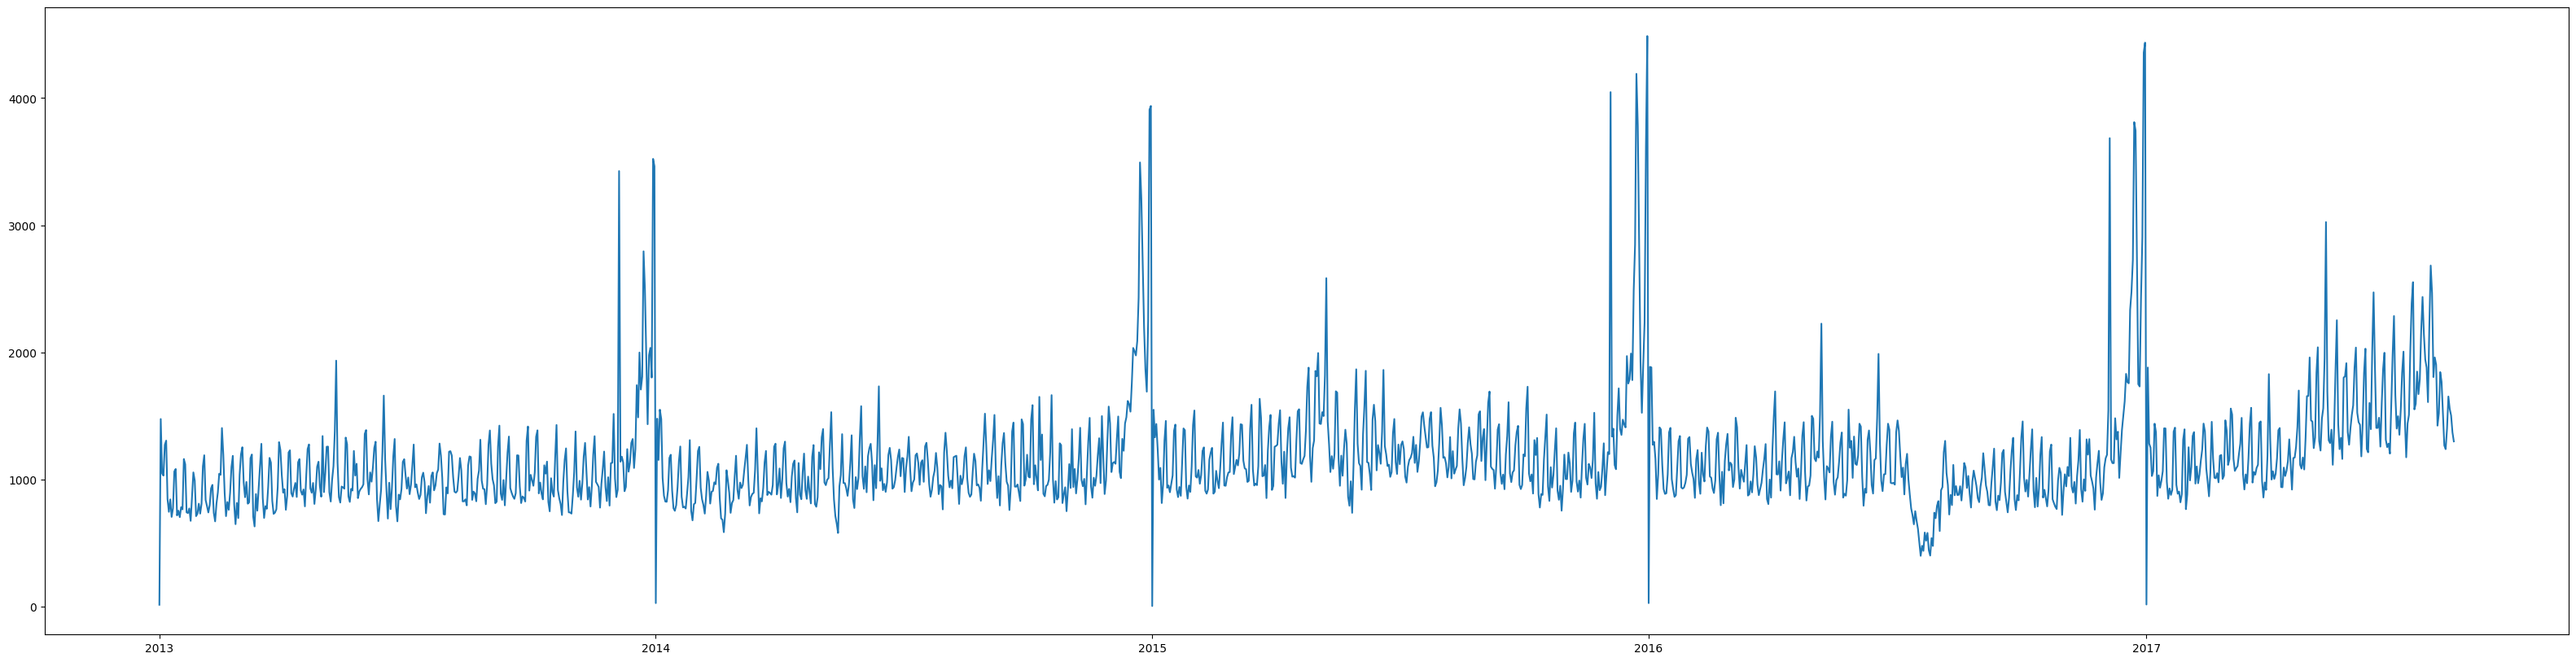

In [20]:
plt.plot(stores2[stores2.family=='GROCERY II'].set_index('time')['sales'])
plt.show()

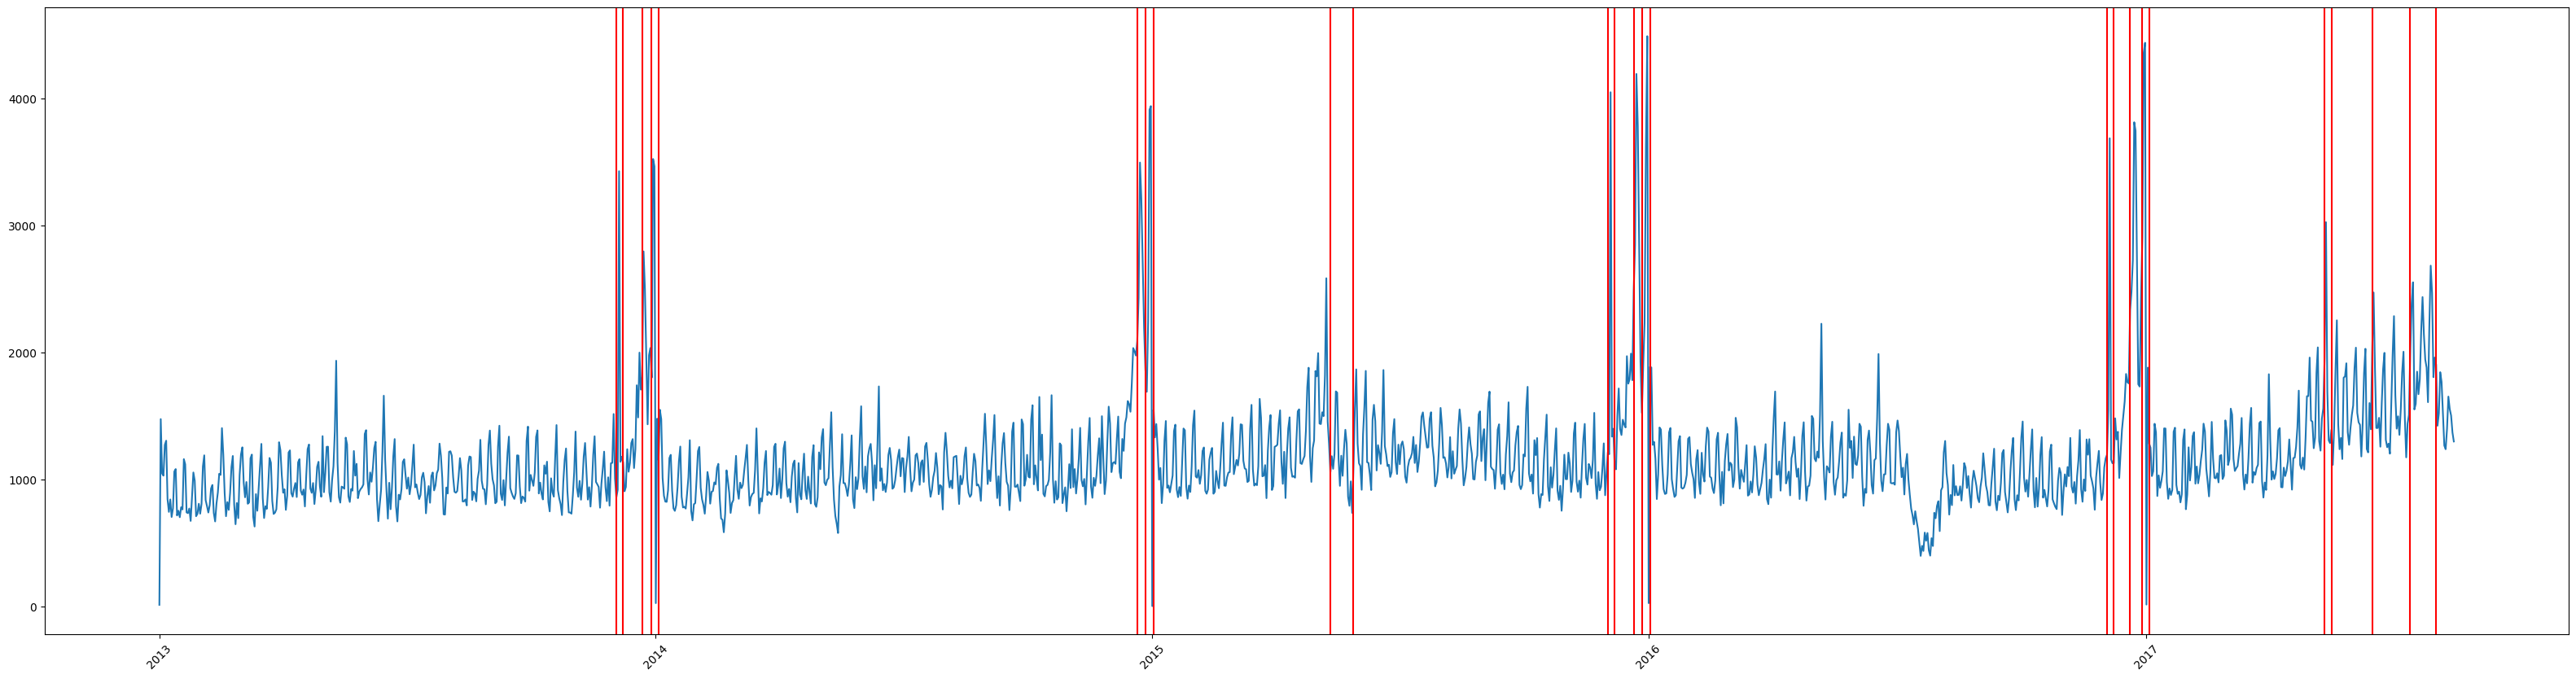

In [21]:
from kats.detectors.cusum_detection import CUSUMDetector
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters
from kats.detectors.robust_stat_detection import RobustStatDetector

tsd = TimeSeriesData(stores2[stores2.family=='GROCERY II'].loc[:,['time','sales']])

detector = RobustStatDetector(tsd)
change_points = detector.detector()

# detector = BOCPDetector(tsd)


# changepoints = detector.detector(
#     model=BOCPDModelType.NORMAL_KNOWN_MODEL # this is the default choice
# )


# detector = CUSUMDetector(tsd)
# change_points = detector.detector(change_directions=["increase"])

detector.plot(change_points,figsize=(20, 10))
plt.xticks(rotation=45)
plt.show()

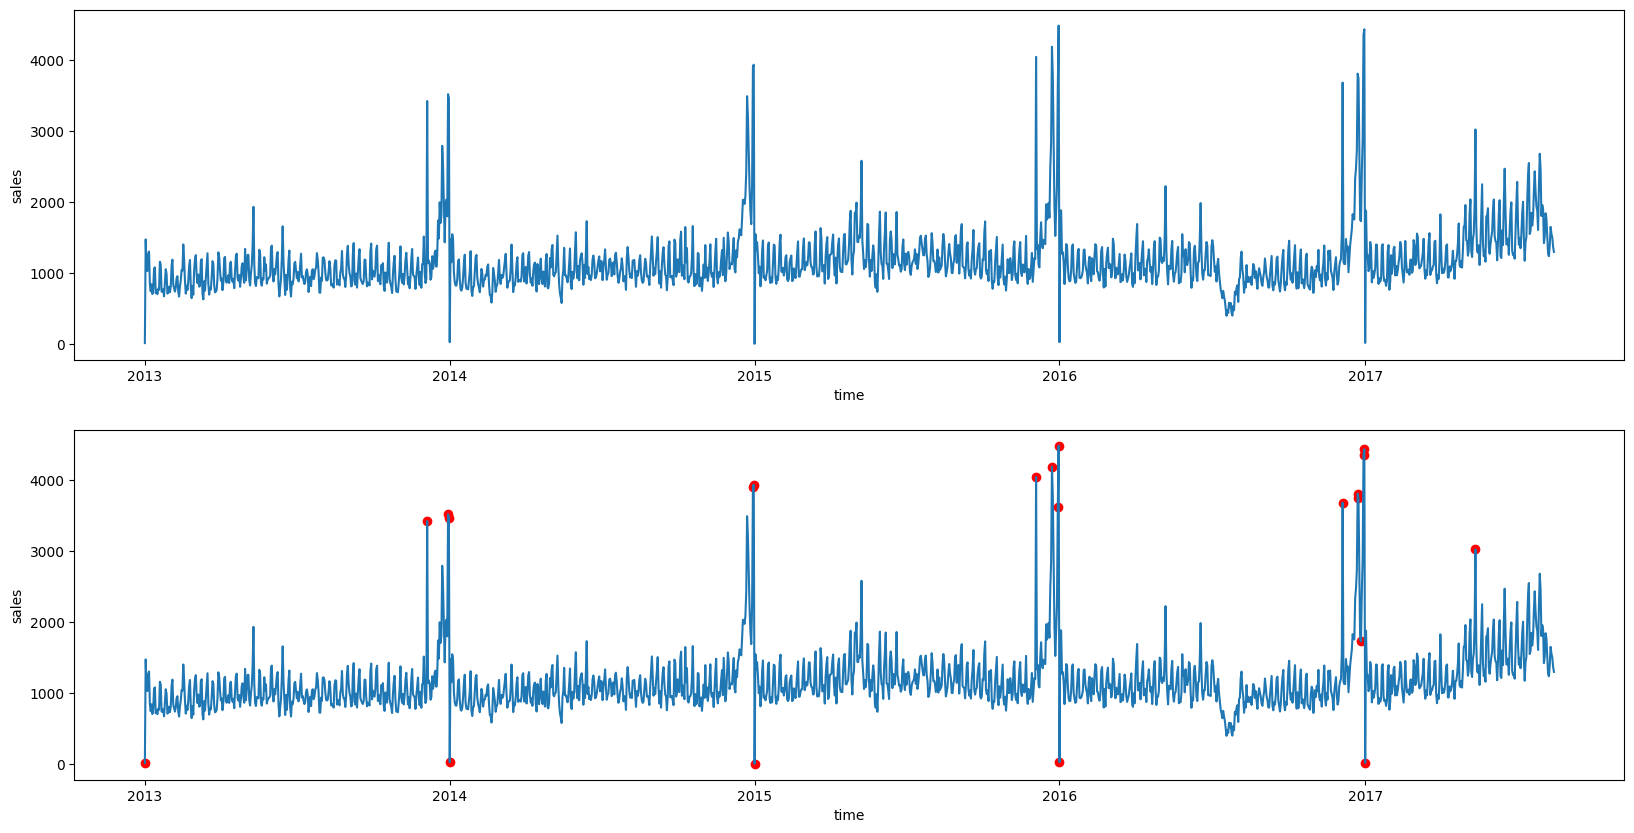

In [22]:
from kats.detectors.outlier import OutlierDetector

ts_outlierDetection = OutlierDetector(tsd, 'additive') # call OutlierDetector
ts_outlierDetection.detector()

# fig, ax = plt.subplots(figsize=(20,8), nrows=1, ncols=2)
# groceries_outliers_removed = ts_outlierDetection.remover(interpolate = False) # No interpolation
# groceries_outliers_interpolated = ts_outlierDetection.remover(interpolate = True) # With interpolation

# groceries_outliers_removed.to_dataframe().plot(x = 'time',y = 'y_0', ax= ax[0])
# ax[0].set_title("Outliers Removed : No interpolation")
# groceries_outliers_interpolated.to_dataframe().plot(x = 'time',y = 'y_0', ax= ax[1])
# ax[1].set_title("Outliers Removed : With interpolation")
# plt.show()
# ts_outlierDetection.outliers[0]

outliers=pd.DataFrame(ts_outlierDetection.outliers[0],columns=['time'])
tsd_df=tsd.to_dataframe()
tsd_df=pd.merge(tsd_df,outliers,on=['time','time'],how='outer',indicator=True)
tsd_df['anomaly']=np.where(tsd_df._merge=="both",1,0)

fig,axs=plt.subplots(nrows=2,figsize=(20,10))
sns.lineplot(data=tsd_df,x='time',y='sales',ax=axs[0])
sns.lineplot(data=tsd_df,x='time',y='sales',ax=axs[1])
tsd_outlier=tsd_df[tsd_df.anomaly==1]
plt.scatter(tsd_outlier.time,tsd_outlier.sales,color='r')
plt.show()

In [23]:
stores2

,time,family,sales
0,2013-01-01,AUTOMOTIVE,0.000000
1,2013-01-01,BABY CARE,0.000000
2,2013-01-01,BEAUTY,2.000000
3,2013-01-01,BEVERAGES,810.000000
4,2013-01-01,BOOKS,0.000000
...,...,...,...
55567,2017-08-15,POULTRY,17586.709986
55568,2017-08-15,PREPARED FOODS,4641.522980
55569,2017-08-15,PRODUCE,125108.971000
55570,2017-08-15,SCHOOL AND OFFICE SUPPLIES,2530.000000


### Time Series Clustering and Classification

In [24]:
stores3=stores2[stores2.time<="2014-01-01"]
stores3_filter=stores3[stores3.family.isin(['AUTOMOTIVE','BABY CARE','DAIRY','MEATS','PRODUCE','SEAFOOD'])]
stores3=pd.pivot_table(stores3, values = 'sales', index=['family'], columns = 'time').reset_index()
stores3_array=stores3.set_index('family').to_numpy()

In [25]:
col_list=stores2.family.drop_duplicates().to_list()
col_list[0]

'AUTOMOTIVE'

In [26]:
from dtaidistance import dtw, clustering

# p = pairwise_distances(X[:,:100], metric = distDTW)
timeseries=stores3_array
model1 = clustering.Hierarchical(dtw.distance_matrix_fast, {})
cluster_idx = model1.fit(timeseries)
# Keep track of full tree by using the HierarchicalTree wrapper class
model2 = clustering.HierarchicalTree(model1)
cluster_idx = model2.fit(timeseries)
# # You can also pass keyword arguments identical to instantiate a Hierarchical object
# model2 = clustering.HierarchicalTree(dists_fun=dtw.distance_matrix_fast, dists_options={})
# cluster_idx = model2.fit(timeseries)
# SciPy linkage clustering
model3 = clustering.LinkageTree(dtw.distance_matrix_fast, {})
cluster_idx = model3.fit(timeseries)

 97%|███████████████████████████████████████████████████████████████████████████████████████▎  | 32/33 [00:00<?, ?it/s]


In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
show_ts_label = lambda idx: col_list[idx]+"-" + str(idx)
model3.plot("./hierarchy.png", axes=ax, show_ts_label=show_ts_label,
           show_tr_label=True, ts_label_margin=-10,
           ts_left_margin=10, ts_sample_length=100,ts_height=1)
plt.show()


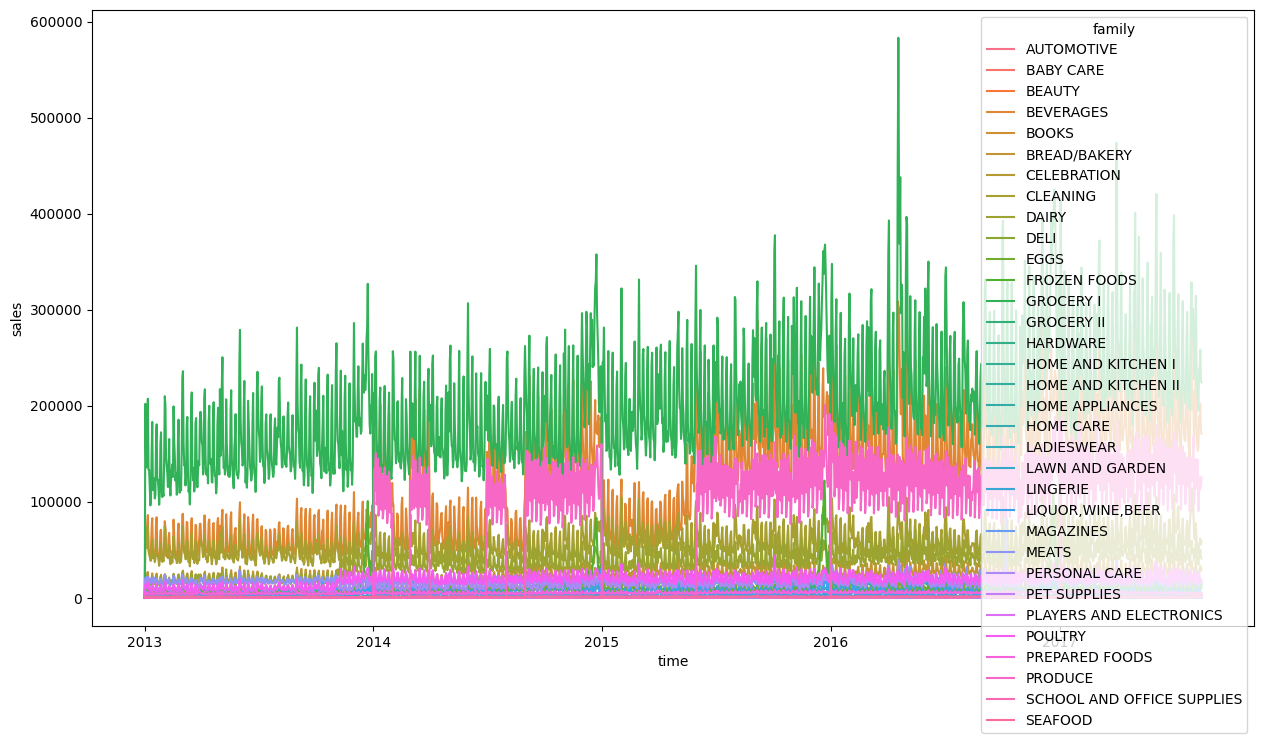

In [28]:
plt.figure(figsize=(15,8))

sns.lineplot(data=stores2,x='time',y='sales',hue='family')
plt.show()

In [29]:
tsd

,time,sales
0,2013-01-01,15.0
1,2013-01-02,1476.0
2,2013-01-03,1048.0
3,2013-01-04,1031.0
4,2013-01-05,1273.0
...,...,...
1679,2017-08-11,1653.0
1680,2017-08-12,1555.0
1681,2017-08-13,1504.0
1682,2017-08-14,1371.0


In [30]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")
check_stationarity(tsd.to_dataframe().sales)

ADF Statistic: -5.921880
p-value: 0.000000
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568
Stationary


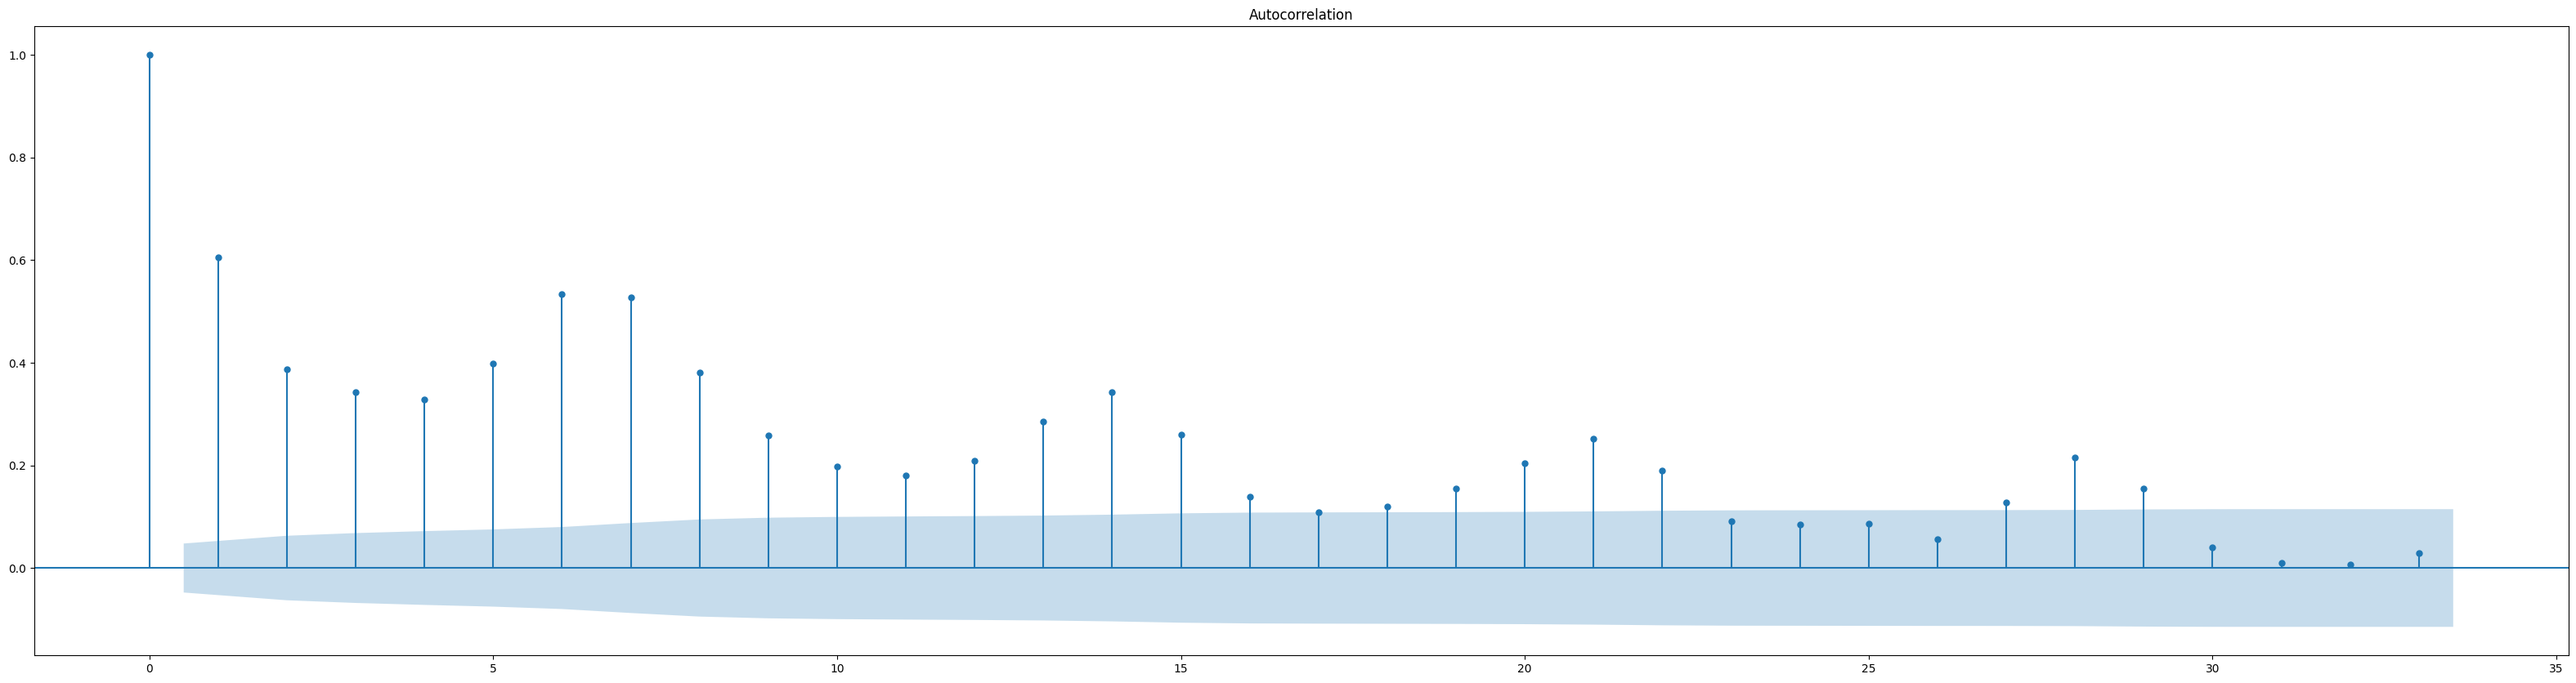

In [31]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(tsd.to_dataframe().sales)
plt.show()

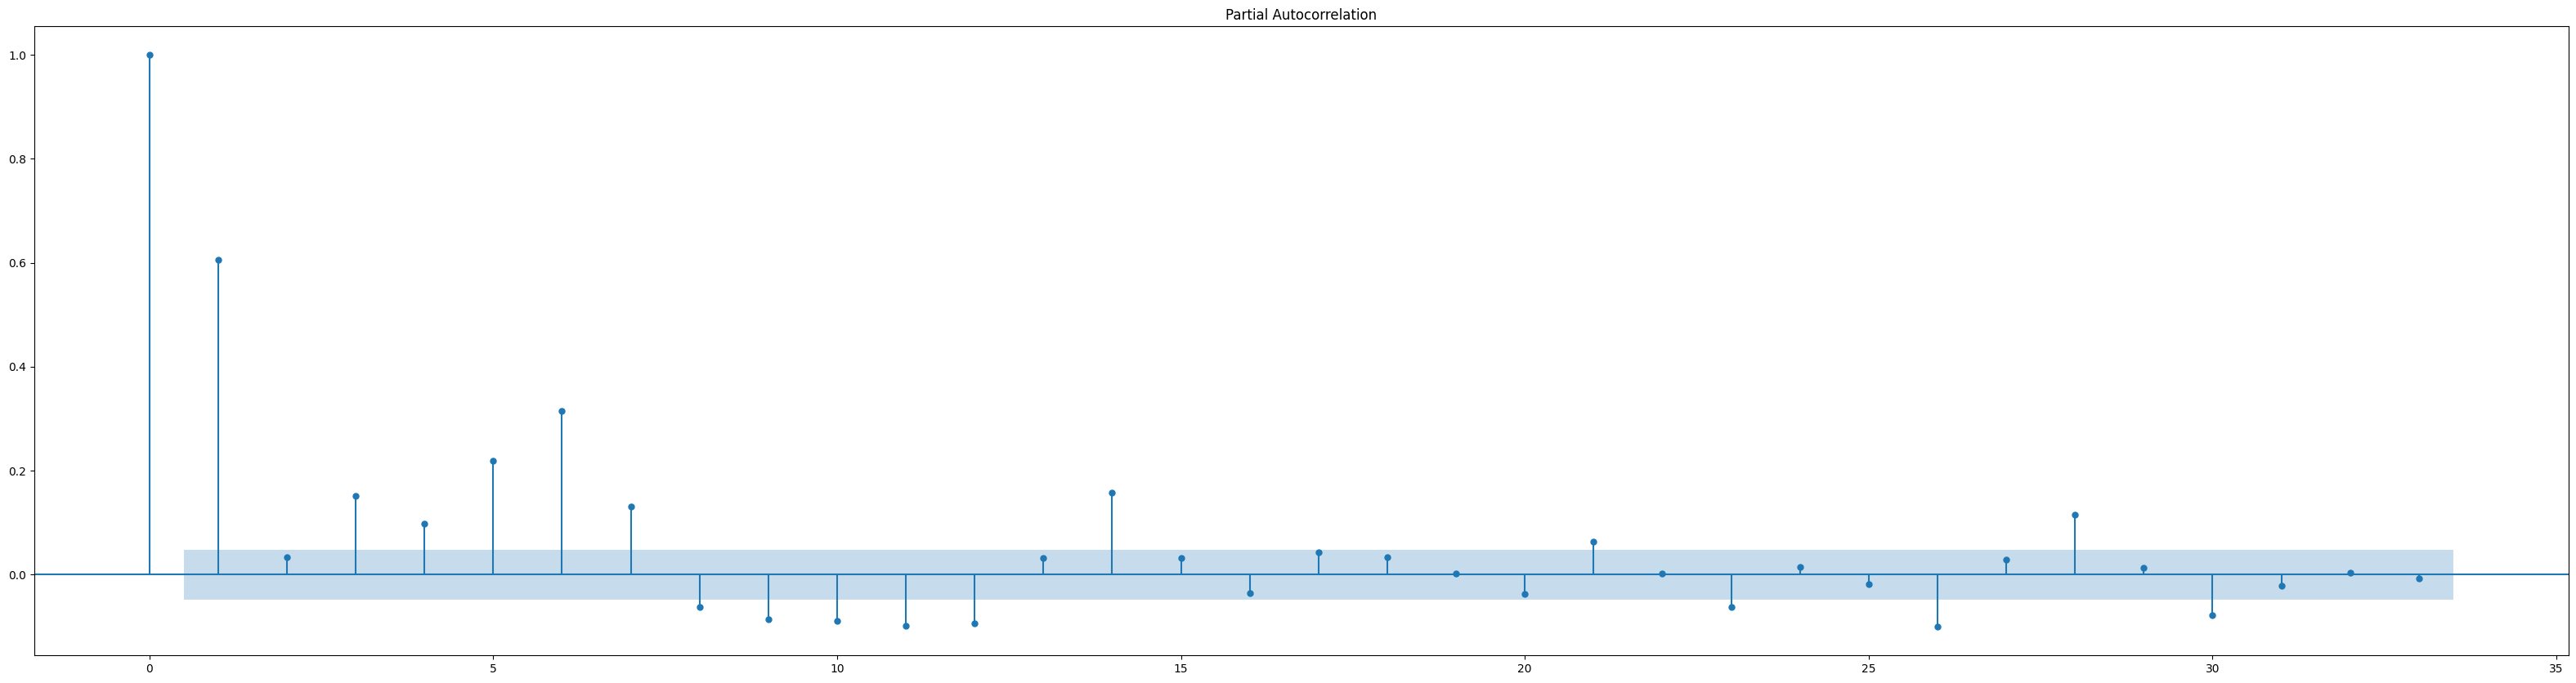

In [32]:
plot_pacf(tsd.to_dataframe().sales)
plt.show()

### Moving Average

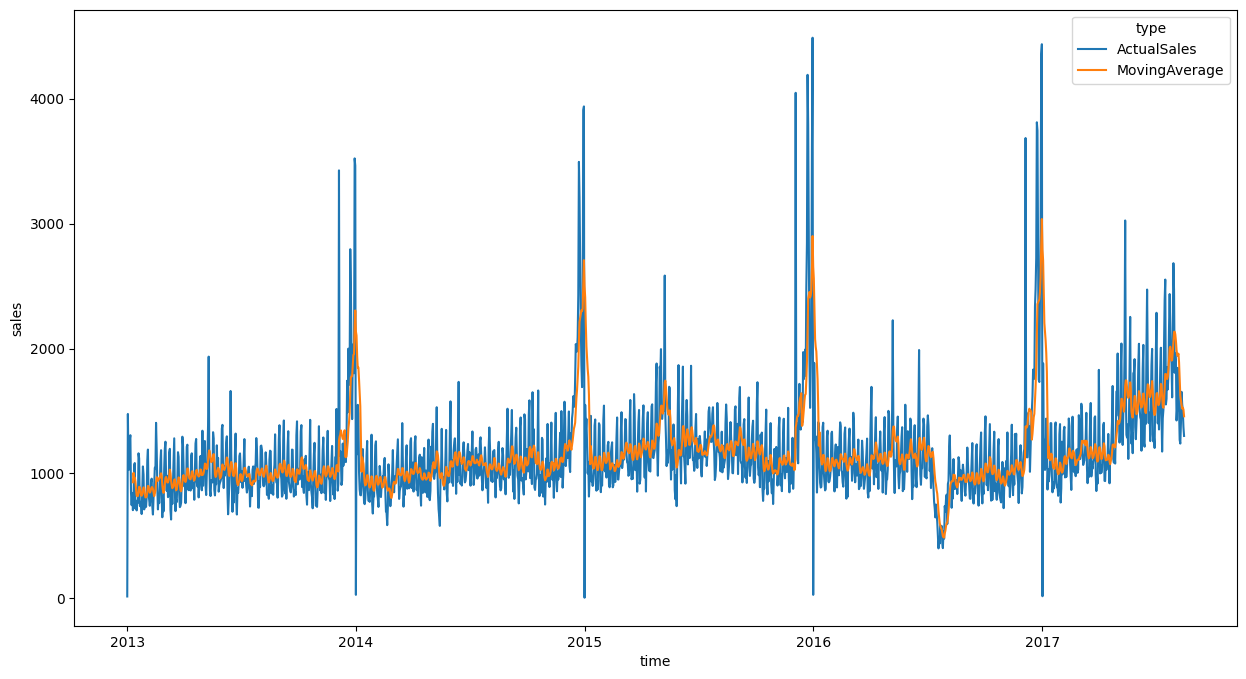

In [33]:
tsd_df['MA']=tsd_df.set_index('time')['sales'].rolling(window=10).mean()
MA=tsd_df.set_index('time')['sales'].rolling(window=10).mean().reset_index()
MA['type']='MovingAverage'
tsd_df['type']='ActualSales'
tsd_df2=tsd_df[['time','sales']]
MA2=MA[['time','sales']]
tsd_df3=pd.concat([tsd_df,MA]).reset_index()
plt.figure(figsize=(15,8))

sns.lineplot(tsd_df3,x='time',y='sales',hue='type')
plt.show()

C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\kats\models\holtwinters.py:134: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\kats\models\holtwinters.py:134: FutureWarning:

the 'damped'' keyword is deprecated, use 'damped_trend' instead

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwint

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py:922: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\holtwinters\model.py

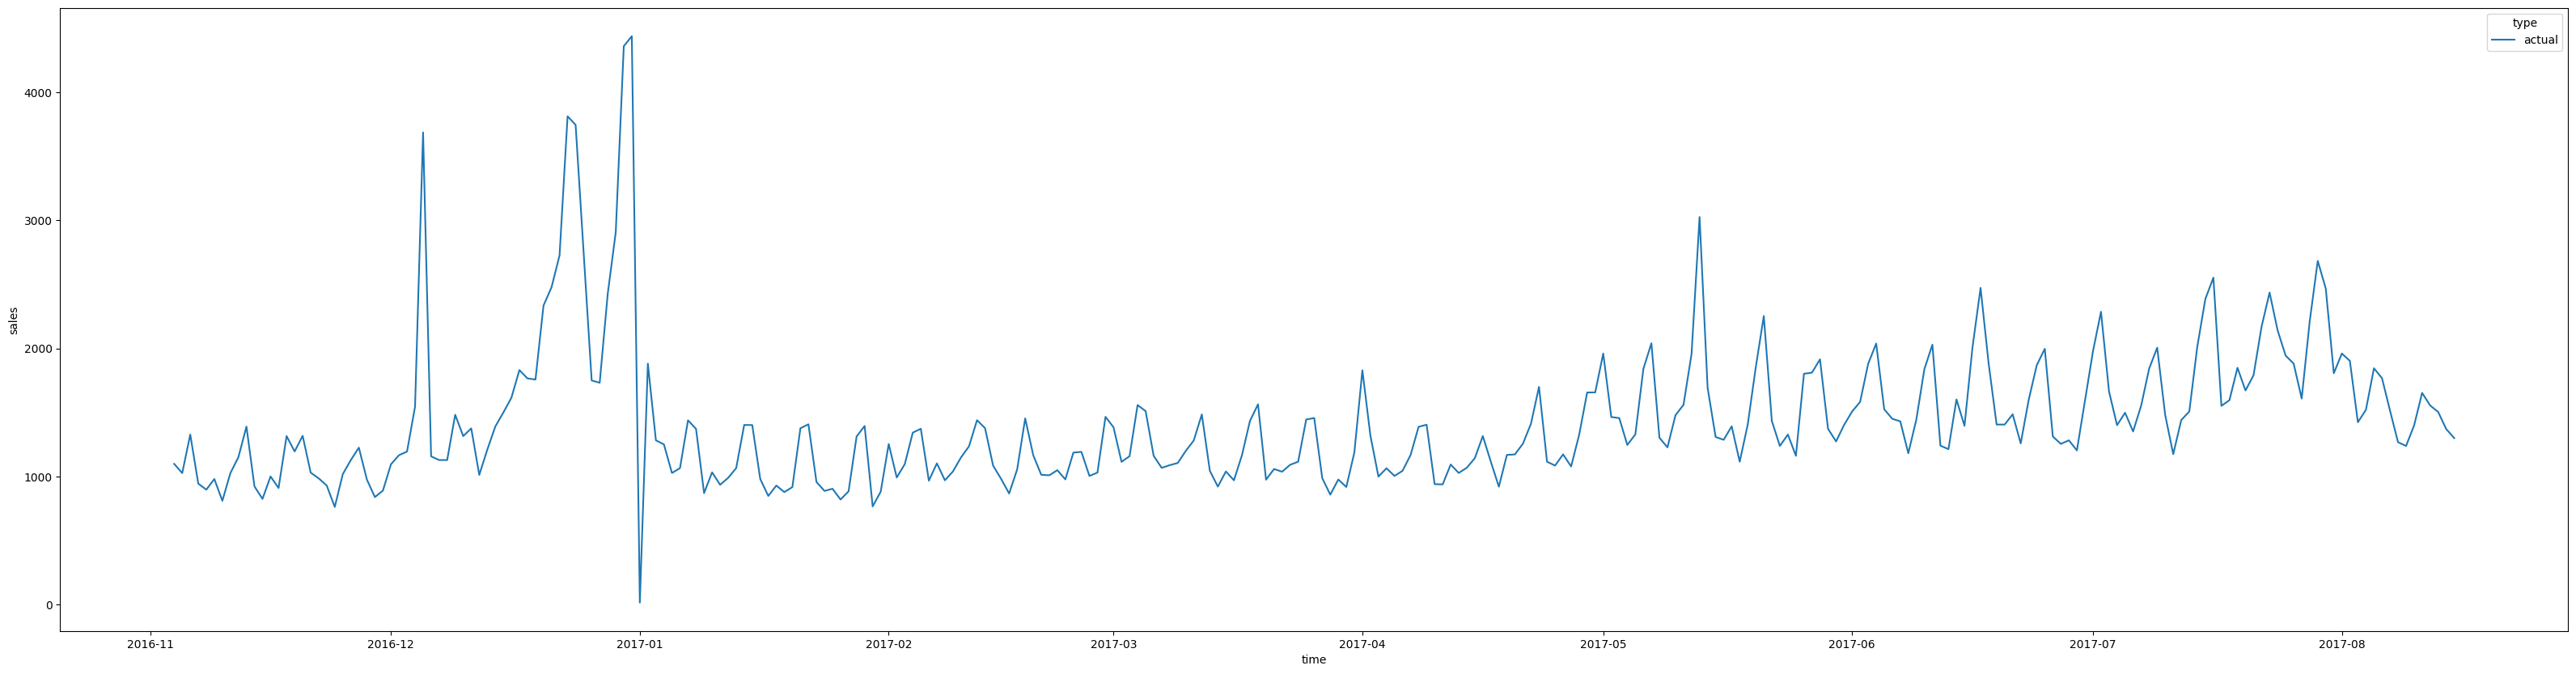

In [34]:
from kats.models.holtwinters import HoltWintersParams, HoltWintersModel
# warnings.simplefilter(action='ignore')


params = HoltWintersParams(
            trend="add",
            #damped=False,
            seasonal="mul",
            seasonal_periods=7,
        )
m = HoltWintersModel(
    data=tsd, 
    params=params)

m.fit()
fcst = m.predict(steps=100, alpha = 0.1)
fcst2=fcst[['time','fcst']]
fcst2['sales']=fcst2['fcst']
fcst2['type']='forecast'
fcst2=fcst2[['time','sales','type']]
tsd_df_hw=tsd_df[['time','sales']]
tsd_df_hw['type']='actual'
hw=pd.concat([fcst2,tsd_df_hw])
sns.lineplot(hw[1500:],x='time',y='sales',hue='type')

plt.show()

C:\Users\ankommar\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



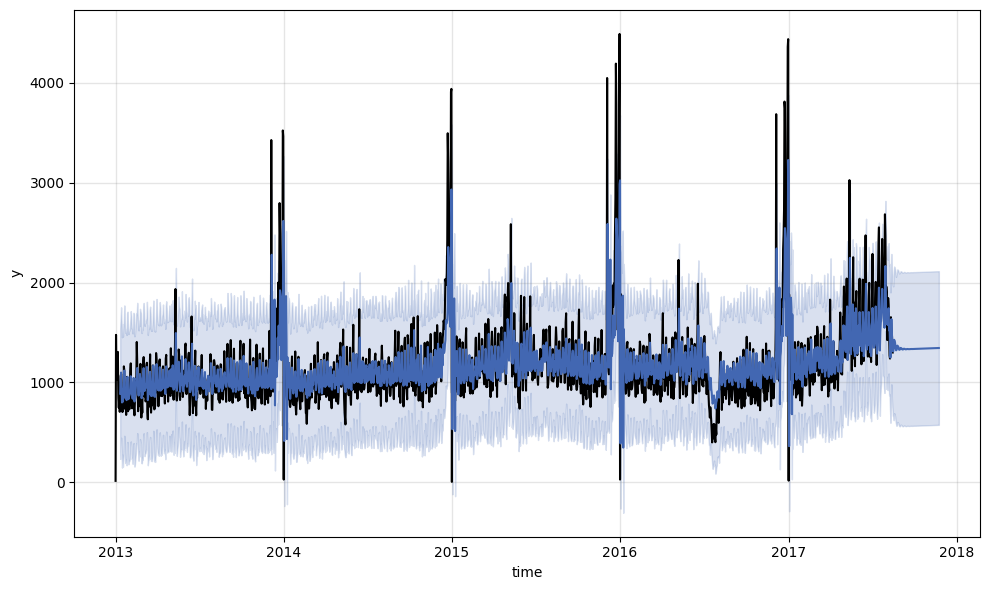

In [35]:
from kats.models.sarima import SARIMAModel, SARIMAParams
# warnings.simplefilter(action='ignore')

# create SARIMA param class
params = SARIMAParams(
    p =1, #AR
    d=0, #Diff
    q=1, #MA
    trend = 'ct', 
    seasonal_order=(1,0,1,7)
    )

# initiate SARIMA model
m = SARIMAModel(data=tsd, params=params)

# fit SARIMA model
m.fit()

# generate forecast values
fcst = m.predict(
    steps=100, 
    freq="D",
    include_history=True
    )

# make plot to visualize
m.plot()
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\ankommar\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



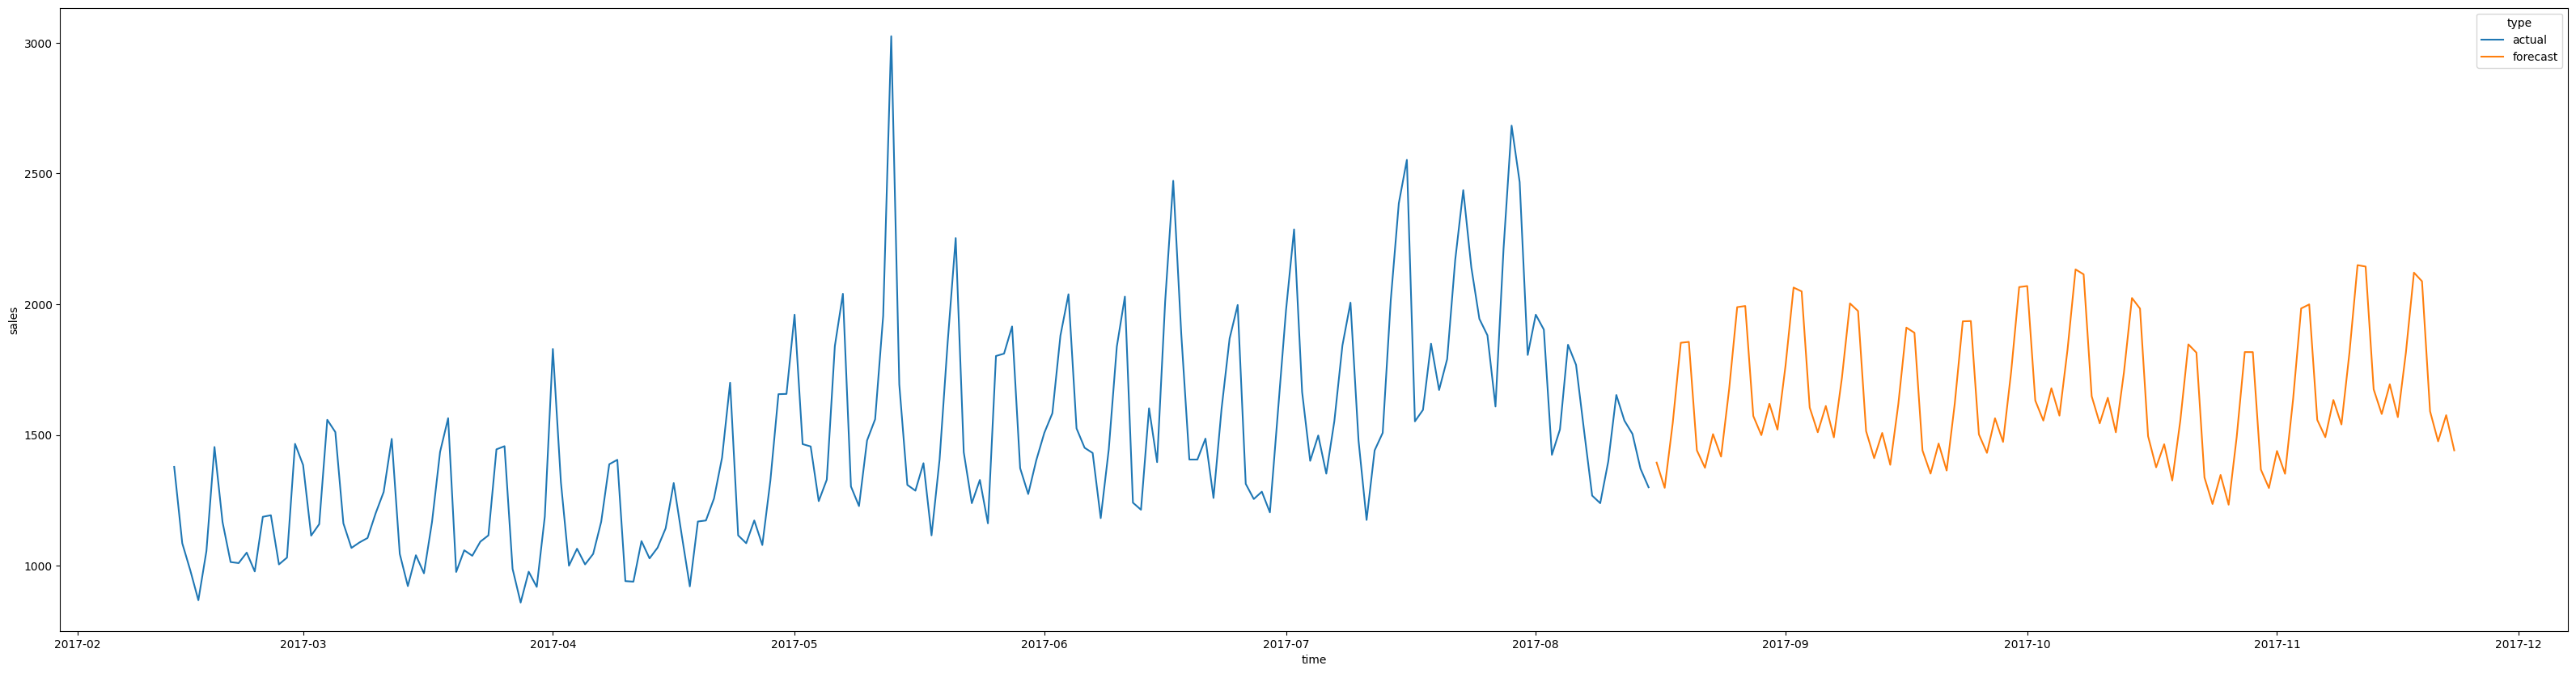

In [36]:
# import the param and model classes for Prophet model
from kats.models.prophet import ProphetModel, ProphetParams

# create a model param instance
params = ProphetParams(seasonality_mode='multiplicative') # additive mode gives worse results

# create a prophet model instance
m = ProphetModel(tsd, params)

# fit model simply by calling m.fit()
m.fit()

# make prediction for next 30 month
fcst = m.predict(steps=100, freq="D")

fcst2=fcst[['time','fcst']]
fcst2['sales']=fcst2['fcst']
fcst2['type']='forecast'
fcst2=fcst2[['time','sales','type']]
tsd_df_hw=tsd_df[['time','sales']]
tsd_df_hw['type']='actual'
hw=pd.concat([fcst2,tsd_df_hw]).groupby(['time','type'])['sales'].mean().reset_index()
# hw
sns.lineplot(hw[1500:],x='time',y='sales',hue='type')
plt.show()

In [37]:
len(hw)

1784